In [1]:
import wbdata
import pandas as pd
import datetime
import requests
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
from mpl_toolkits.mplot3d import Axes3D

In [2]:
#Colection of data from World Bank
data_date = (datetime.datetime(2007, 1, 1), datetime.datetime(2024, 12, 31))

indicators = {'NY.GDP.MKTP.CD' : 'GDP_USD'}

data = wbdata.get_dataframe(indicators, country='KEN')

print(data.head())

           GDP_USD
date              
2024  1.244987e+11
2023  1.080386e+11
2022  1.144490e+11
2021  1.097037e+11
2020  1.006575e+11


In [3]:
#Setting the date to the required time and using the date format
start_date = datetime.datetime(2007, 1, 1)
end_date = datetime.datetime(2024, 1, 1)

gdp_data = data.reset_index()

gdp_data['date'] = pd.to_datetime(gdp_data['date'], format='%Y', errors='coerce')
gdp_data = gdp_data.sort_values('date')

gdp_data = gdp_data[(gdp_data['date'] >= start_date) & (gdp_data['date'] <= end_date)]

print(gdp_data.head())

         date       GDP_USD
17 2007-01-01  3.195820e+10
16 2008-01-01  3.589515e+10
15 2009-01-01  4.234722e+10
14 2010-01-01  4.540562e+10
13 2011-01-01  4.686947e+10


In [4]:
#Drop any missing values
gdp_new_data = gdp_data.dropna()

print(gdp_new_data.head())

         date       GDP_USD
17 2007-01-01  3.195820e+10
16 2008-01-01  3.589515e+10
15 2009-01-01  4.234722e+10
14 2010-01-01  4.540562e+10
13 2011-01-01  4.686947e+10


In [5]:
#Using the exchangerate api to get value of a dollar in kes in realtime
url ="https://open.er-api.com/v6/latest/USD" 
response = requests.get(url)
data = response.json()

usd_to_kes = data["rates"]["KES"]
print(f"The exchange rate used is: {usd_to_kes}")

The exchange rate used is: 129.166284


In [6]:
#Converting the GDP column
gdp_new_data['GDP_KES'] = gdp_new_data['GDP_USD'] * usd_to_kes

print(gdp_new_data.head())

         date       GDP_USD       GDP_KES
17 2007-01-01  3.195820e+10  4.127921e+12
16 2008-01-01  3.589515e+10  4.636444e+12
15 2009-01-01  4.234722e+10  5.469833e+12
14 2010-01-01  4.540562e+10  5.864875e+12
13 2011-01-01  4.686947e+10  6.053956e+12


In [8]:
#Preparing the data
gdp_new_data['Year'] = gdp_new_data['date'].dt.year
gdp_clean_new_data = gdp_new_data[['Year', 'GDP_KES']]

print(gdp_clean_new_data.tail())

   Year       GDP_KES
4  2020  1.300156e+13
3  2021  1.417001e+13
2  2022  1.478295e+13
1  2023  1.395494e+13
0  2024  1.608103e+13


In [18]:
cbk_data = pd.read_csv("C:\DATA ANALYTICS\PYDATA\PyData_Project\data\Mobile_Payments_2010-2024.csv")

<>:1: SyntaxWarning: invalid escape sequence '\D'
<>:1: SyntaxWarning: invalid escape sequence '\D'
C:\Users\HP ELITEBOOK 840 G6\AppData\Local\Temp\ipykernel_27256\3026982200.py:1: SyntaxWarning: invalid escape sequence '\D'
  cbk_data = pd.read_csv("C:\DATA ANALYTICS\PYDATA\PyData_Project\data\Mobile_Payments_2010-2024.csv")


In [19]:
#Setting the data in the desired format
cbk_data['date'] = pd.to_datetime(cbk_data['Year'].astype(str) + '-' + cbk_data['Month'], format='%Y-%B')
cbk_new_data = cbk_data.sort_values('date')
print(cbk_new_data.head())

     Year  Month  Active Agents  Active Agents.1  \
213  2007  March            307         0.020992   
212  2007  April            362         0.054944   
211  2007    May            447         0.107733   
210  2007   June            527         0.175652   
209  2007   July            681         0.268499   

     Total Agent Cash in Cash Out (Volume Million)  \
213                                       0.021714   
212                                       0.070000   
211                                       0.150000   
210                                       0.233661   
209                                       0.354298   

     Total Agent Cash in Cash Out (Value KSh billions)       date  
213                                           0.064391 2007-03-01  
212                                           0.220896 2007-04-01  
211                                           0.483709 2007-05-01  
210                                           0.720102 2007-06-01  
209                   

In [20]:
#Setting the date as the index
Mobile_data = cbk_new_data.set_index('date')
print(Mobile_data.tail())

            Year      Month  Active Agents  Active Agents.1  \
date                                                          
2024-08-01  2024     August         348065            78.64   
2024-09-01  2024  September         367551            79.37   
2024-10-01  2024    October         358621            80.82   
2024-11-01  2024   November         383624            81.55   
2024-12-01  2024   December         381116            82.43   

            Total Agent Cash in Cash Out (Volume Million)  \
date                                                        
2024-08-01                                         214.25   
2024-09-01                                         196.49   
2024-10-01                                         215.26   
2024-11-01                                         297.02   
2024-12-01                                         309.28   

            Total Agent Cash in Cash Out (Value KSh billions)  
date                                                           
20

In [21]:
#Aggregating the CBK mobile data by year(2007-2024)
cbk_yearly = Mobile_data.groupby('Year').agg({
    'Total Agent Cash in Cash Out (Value KSh billions)': 'sum',
   
    'Active Agents': 'mean'
}).reset_index()

print(cbk_yearly.tail())

    Year  Total Agent Cash in Cash Out (Value KSh billions)  Active Agents
13  2020                                           5213.543  251099.666667
14  2021                                           6868.770  298064.250000
15  2022                                           7908.830  306987.500000
16  2023                                           7953.930  328422.833333
17  2024                                           8697.740  345117.666667


In [23]:
#Merging the two datasets
merged_data = pd.merge(cbk_yearly, gdp_new_data, on='Year', how='inner')

print(merged_data.tail())

    Year  Total Agent Cash in Cash Out (Value KSh billions)  Active Agents  \
13  2020                                           5213.543  251099.666667   
14  2021                                           6868.770  298064.250000   
15  2022                                           7908.830  306987.500000   
16  2023                                           7953.930  328422.833333   
17  2024                                           8697.740  345117.666667   

         date       GDP_USD       GDP_KES  
13 2020-01-01  1.006575e+11  1.300156e+13  
14 2021-01-01  1.097037e+11  1.417001e+13  
15 2022-01-01  1.144490e+11  1.478295e+13  
16 2023-01-01  1.080386e+11  1.395494e+13  
17 2024-01-01  1.244987e+11  1.608103e+13  


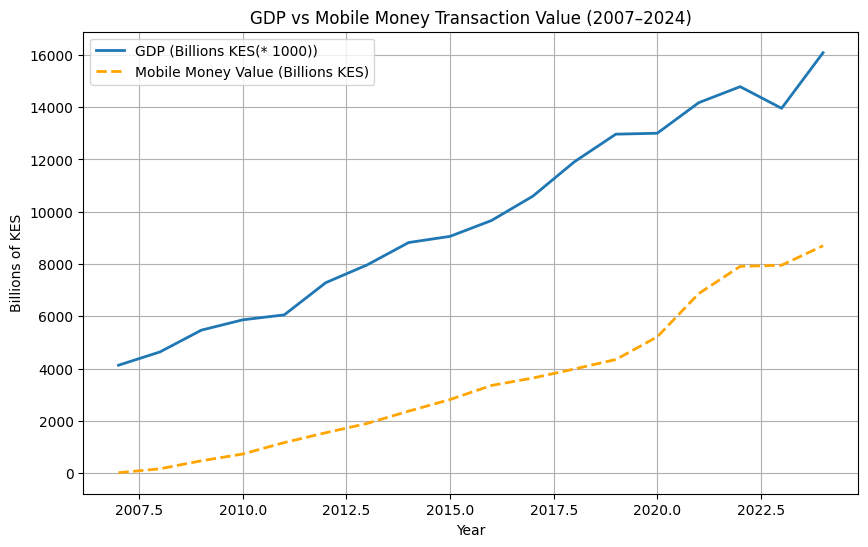

In [28]:
#Drawing the line plots to show trends over time
plt.figure(figsize=(10, 6))

plt.plot(merged_data['Year'], merged_data['GDP_KES']/1e9, label='GDP (Billions KES(* 1000))', linewidth=2)
plt.plot(merged_data['Year'], merged_data['Total Agent Cash in Cash Out (Value KSh billions)'], 
         label='Mobile Money Value (Billions KES)', linewidth=2, linestyle='--', color='orange')

plt.title('GDP vs Mobile Money Transaction Value (2007–2024)')
plt.xlabel('Year')
plt.ylabel('Billions of KES')
plt.legend()
plt.grid(True)
plt.show()


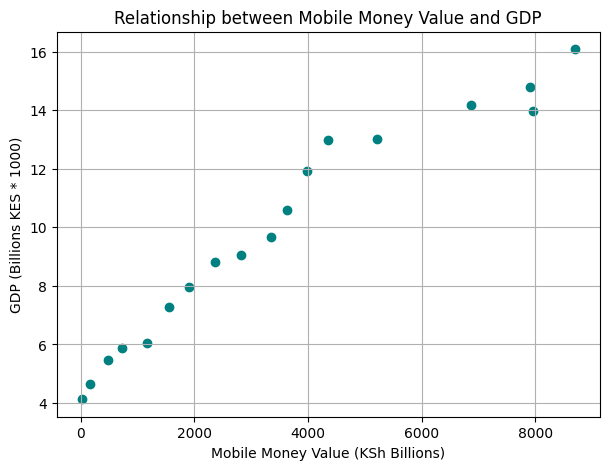

In [29]:
#Scatter Plot Showing the relationship between mobile money value and GDP
plt.figure(figsize=(7,5))
plt.scatter(merged_data['Total Agent Cash in Cash Out (Value KSh billions)'], merged_data['GDP_KES']/1e12, color='teal')
plt.title('Relationship between Mobile Money Value and GDP')
plt.xlabel('Mobile Money Value (KSh Billions)')
plt.ylabel('GDP (Billions KES * 1000)')
plt.grid(True)

plt.savefig('scatter_plot_GDPvsMobileMoney.png', bbox_inches='tight', dpi=300)

plt.show()

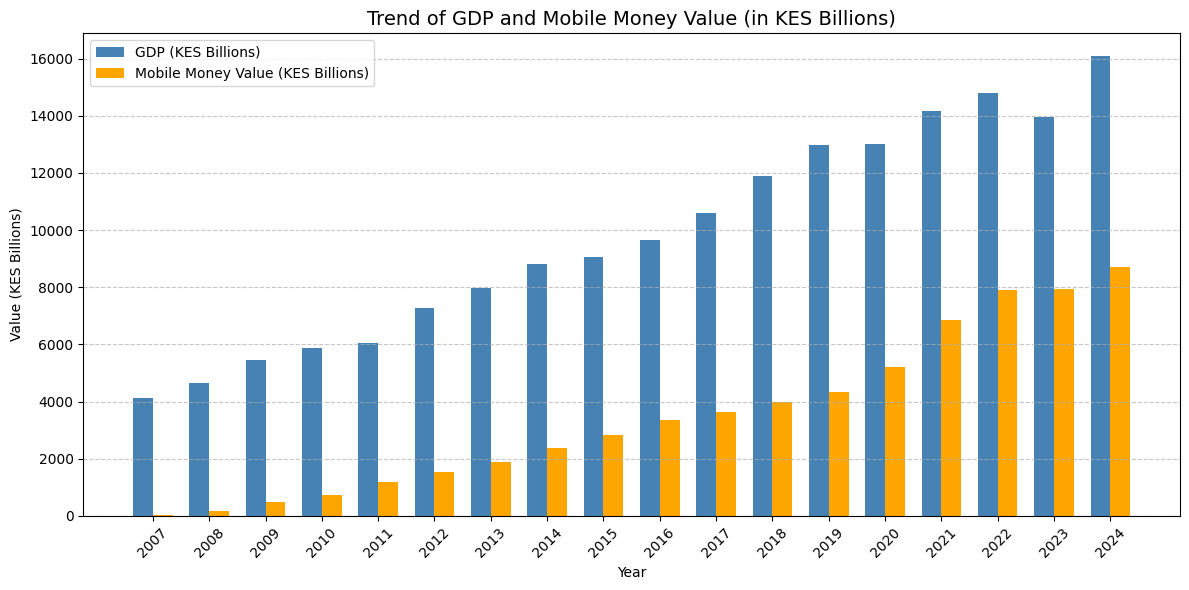

In [30]:
#Line plots comparing the GDP and Mobile Money Value in Billions
merged_data['GDP_Billions'] = merged_data['GDP_KES'] / 1e9
merged_data['Mobile_Money_Billions'] = merged_data['Total Agent Cash in Cash Out (Value KSh billions)']

years = merged_data['Year']
x = np.arange(len(years))  
width = 0.35  


plt.figure(figsize=(12,6))
plt.bar(x - width/2, merged_data['GDP_Billions'], width, label='GDP (KES Billions)', color='steelblue')
plt.bar(x + width/2, merged_data['Mobile_Money_Billions'], width, label='Mobile Money Value (KES Billions)', color='orange')

plt.title('Trend of GDP and Mobile Money Value (in KES Billions)', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Value (KES Billions)')
plt.xticks(x, years, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.savefig('bar_plot_GDP_vs_MobileMoney.png', bbox_inches='tight', dpi=300)

plt.show()

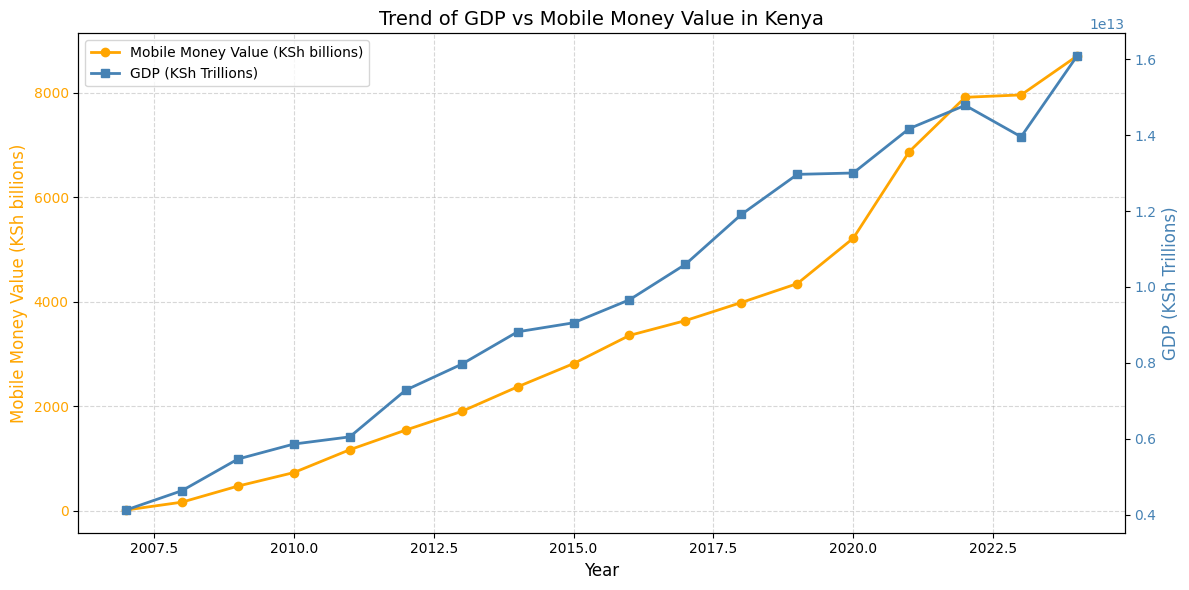

In [32]:
#Dual line plot(GDP vs Mobile Money Value)

fig, ax1 = plt.subplots(figsize=(12,6))


ax1.plot(merged_data['Year'], 
         merged_data['Total Agent Cash in Cash Out (Value KSh billions)'], 
         color='orange', 
         marker='o', 
         linewidth=2, 
         label='Mobile Money Value (KSh billions)')
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('Mobile Money Value (KSh billions)', color='orange', fontsize=12)
ax1.tick_params(axis='y', labelcolor='orange')


ax2 = ax1.twinx()
ax2.plot(merged_data['Year'], 
         merged_data['GDP_KES'], 
         color='steelblue', 
         marker='s', 
         linewidth=2, 
         label='GDP (KSh Trillions)')
ax2.set_ylabel('GDP (KSh Trillions)', color='steelblue', fontsize=12)
ax2.tick_params(axis='y', labelcolor='steelblue')


plt.title('Trend of GDP vs Mobile Money Value in Kenya', fontsize=14)
ax1.grid(True, linestyle='--', alpha=0.5)


lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.tight_layout()
plt.show()

fig.savefig('dual_line_plot_GDPvsMobileMoney.png', bbox_inches='tight', dpi=300)

In [33]:
#Regression Analysis
#The purpose of regression analysis id to test whether mobile money transactions can explain or predict the changes in Kenya's GDP.
X = merged_data['Total Agent Cash in Cash Out (Value KSh billions)']
y = merged_data['GDP_KES']

# Add constant term for intercept
# GDP = a + b*(Mobile money)
X = sm.add_constant(X)

# Fit regression model
#This model is known as the ordinary least squares regression.
model = sm.OLS(y, X).fit()

# Display summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                GDP_KES   R-squared:                       0.941
Model:                            OLS   Adj. R-squared:                  0.938
Method:                 Least Squares   F-statistic:                     256.5
Date:                Mon, 20 Oct 2025   Prob (F-statistic):           2.85e-11
Time:                        12:50:26   Log-Likelihood:                -520.86
No. Observations:                  18   AIC:                             1046.
Df Residuals:                      16   BIC:                             1047.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                                        coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------

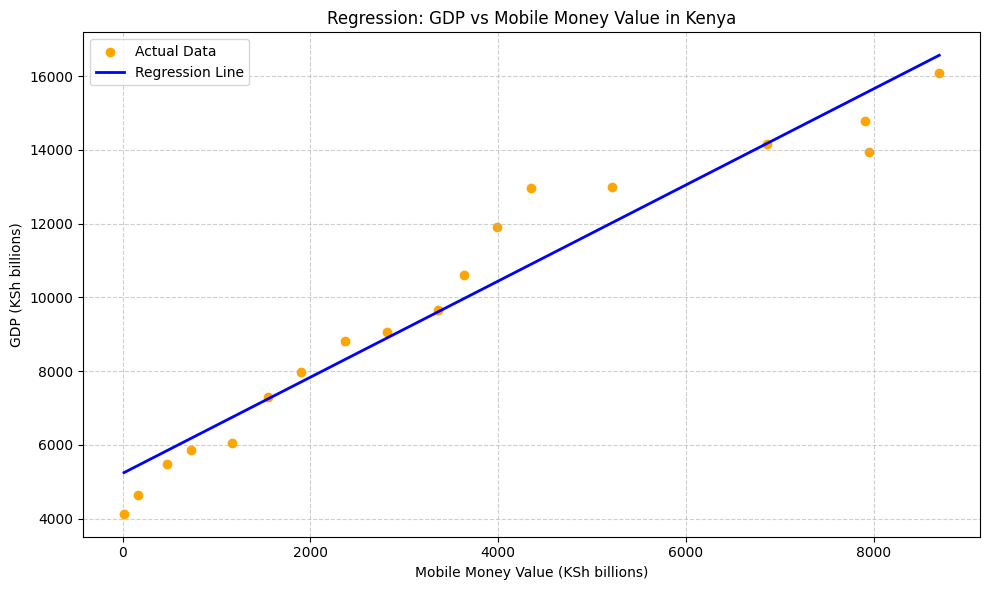

In [ ]:
#Visualizing the Regression Line
#A regression line is a straight line that best fits the data points in a scatter plot, showing the relationship between two variables.
plt.figure(figsize=(10,6))


plt.scatter(
    merged_data['Total Agent Cash in Cash Out (Value KSh billions)'], 
    merged_data['GDP_KES'] / 1e9,   
    color='orange', label='Actual Data'
)


plt.plot(
    merged_data['Total Agent Cash in Cash Out (Value KSh billions)'], 
    model.predict(X) / 1e9,          
    color='blue', linewidth=2, label='Regression Line'
)

plt.xlabel('Mobile Money Value (KSh billions)')
plt.ylabel('GDP (KSh billions)')
plt.title('Regression: GDP vs Mobile Money Value in Kenya')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.savefig('regression_GDP_vs_MobileMoney.png', bbox_inches='tight', dpi=300)
plt.show()
